In [8]:
import os
import keras
#from keras import optimizers

In [9]:
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [10]:
## 資料前處理
def preproc_x(x, flatten=True): #flatten是numpy.ndarray.flatten的一個函數，即返回一個一維數組。
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1)) #reshape（行，列）可以根据指定的数值将数据转换为特定的行数和列数，这个好理解，就是转换成矩阵。
    return x

def preproc_y(y, num_classes=10): # 影像類別數
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes) #keras.utils.to_categorical函數：是把類別標籤轉換爲onehot編碼（categorical就是類別標籤的意思，表示現實世界中你分類的各類別）， 而onehot編碼是一種方便計算機處理的二元編碼。**
    return y

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
'''

def build_mlp():
    """
    Build your own model
    """
    
    return model
'''

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x) ##全连接层 units: 正整数，输出空间维度 activation: 激活函数
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
##Dense就是常用的全连接层，所实现的运算是output = activation(dot(input, kernel)+bias)。其中activation是逐元素计算的激活函数，kernel`是本层的权值矩阵，bias为偏置向量，只有当use_bias=True才会添加。


In [13]:
## 超參數設定

LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Optimizers = {'SGD': keras.optimizers.SGD, 
             'Adagrad': keras.optimizers.Adagrad,  
             'RMSprop': keras.optimizers.RMSprop, 
             'Adam': keras.optimizers.Adam}

In [14]:
results = {}

for opt_name, opt in Optimizers.items():
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉 session保存在服务器，客户端不知道其中的信息；cookie保存在客户端，服务器能够知道其中的信息。
        print("Experiment with LR = %.6f, Optimizers= %s" % (lr, opt_name)) #格式化字符串
        model = build_mlp(input_shape=x_train.shape[1:]) ###多层感知机（MLP） # _shape 形狀
        model.summary()
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt(lr=lr)) #compile() 函数将一个字符串编译为字节代码。
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), #形式为（X，y）或（X，y，sample_weights）的tuple，是指定的验证集。此参数将覆盖validation_spilt。
                  shuffle=True) #shuffle：是否把數據隨機打亂之後再進行訓練
    
        # Collect results ＃收集結果
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "opt-%s-lr-%.6f" % (opt_name, lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
        #categorical_crossentropy：亦称作多类的对数损失，注意使用该目标函数时，需要将标签转化为形如(nb_samples, nb_classes)的二值序列
        #metrics指標  accuracy 準確率

Experiment with LR = 0.100000, Optimizers= SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 1

50000/50000 [==============================] - 17s 344us/step - loss: 0.7717 - acc: 0.7234 - val_loss: 1.6532 - val_acc: 0.5085
Epoch 50/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.7623 - acc: 0.7284 - val_loss: 1.6593 - val_acc: 0.4950
Experiment with LR = 0.010000, Optimizers= SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)           

50000/50000 [==============================] - 13s 268us/step - loss: 1.2302 - acc: 0.5692 - val_loss: 1.5760 - val_acc: 0.4490
Epoch 50/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.2221 - acc: 0.5724 - val_loss: 1.5824 - val_acc: 0.4512
Experiment with LR = 0.001000, Optimizers= SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)           

50000/50000 [==============================] - 10s 210us/step - loss: 1.6821 - acc: 0.4112 - val_loss: 1.6865 - val_acc: 0.4068
Epoch 50/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.6789 - acc: 0.4145 - val_loss: 1.6836 - val_acc: 0.4066
Experiment with LR = 0.000100, Optimizers= SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)           

Epoch 50/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.0523 - acc: 0.2984 - val_loss: 2.0506 - val_acc: 0.2972
Experiment with LR = 0.000010, Optimizers= SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________

50000/50000 [==============================] - 11s 212us/step - loss: 2.2590 - acc: 0.1763 - val_loss: 2.2566 - val_acc: 0.1795
Experiment with LR = 0.100000, Optimizers= Adagrad
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________

50000/50000 [==============================] - 11s 214us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000, Optimizers= Adagrad
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________

50000/50000 [==============================] - 10s 206us/step - loss: 14.5060 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.001000, Optimizers= Adagrad
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________

50000/50000 [==============================] - 11s 228us/step - loss: 1.2443 - acc: 0.5664 - val_loss: 1.3605 - val_acc: 0.5198
Experiment with LR = 0.000100, Optimizers= Adagrad
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________

50000/50000 [==============================] - 11s 224us/step - loss: 1.6513 - acc: 0.4283 - val_loss: 1.6627 - val_acc: 0.4171
Experiment with LR = 0.000010, Optimizers= Adagrad
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________

50000/50000 [==============================] - 12s 234us/step - loss: 2.0141 - acc: 0.3103 - val_loss: 2.0165 - val_acc: 0.3026
Experiment with LR = 0.100000, Optimizers= RMSprop
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________

50000/50000 [==============================] - 11s 227us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000, Optimizers= RMSprop
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________

50000/50000 [==============================] - 11s 228us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.001000, Optimizers= RMSprop
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________

50000/50000 [==============================] - 11s 222us/step - loss: 0.7628 - acc: 0.7257 - val_loss: 2.1229 - val_acc: 0.4742
Experiment with LR = 0.000100, Optimizers= RMSprop
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________

50000/50000 [==============================] - 11s 226us/step - loss: 0.9416 - acc: 0.6752 - val_loss: 1.4078 - val_acc: 0.5152
Experiment with LR = 0.000010, Optimizers= RMSprop
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________

Experiment with LR = 0.100000, Optimizers= Adam
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 249us/step - loss: 14.4398 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 12s 231us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 12s 231us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 12s 233us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 12s 231us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 11s 221us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 12s 232us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 12s 231us/step - loss: 0.8912 - acc: 0.6791 - val_loss: 1.5682 - val_acc: 0.4947
Epoch 33/50
50000/50000 [==============================] - 12s 231us/step - loss: 0.8779 - acc: 0.6870 - val_loss: 1.4784 - val_acc: 0.5276
Epoch 34/50
50000/50000 [==============================] - 11s 229us/step - loss: 0.8594 - acc: 0.6927 - val_loss: 1.5149 - val_acc: 0.5219
Epoch 35/50
50000/50000 [==============================] - 12s 231us/step - loss: 0.8479 - acc: 0.6967 - val_loss: 1.5336 - val_acc: 0.5167
Epoch 36/50
50000/50000 [==============================] - 12s 230us/step - loss: 0.8369 - acc: 0.7008 - val_loss: 1.5251 - val_acc: 0.5232
Epoch 37/50
50000/50000 [==============================] - 12s 230us/step - loss: 0.8086 - acc: 0.7097 - val_loss: 1.5429 - val_acc: 0.5175
Epoch 38/50
50000/50000 [==============================] - 12s 232us/step - loss: 0.7947 - acc: 0.7143 - val_loss: 1.5743 - val_acc: 0.5226
Epoch 39/50
50000/50000 [=======

Epoch 33/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.0086 - acc: 0.6499 - val_loss: 1.3338 - val_acc: 0.5333
Epoch 34/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.0024 - acc: 0.6517 - val_loss: 1.3196 - val_acc: 0.5420
Epoch 35/50
50000/50000 [==============================] - 11s 228us/step - loss: 0.9885 - acc: 0.6568 - val_loss: 1.3191 - val_acc: 0.5360
Epoch 36/50
50000/50000 [==============================] - 11s 228us/step - loss: 0.9700 - acc: 0.6639 - val_loss: 1.3504 - val_acc: 0.5260
Epoch 37/50
50000/50000 [==============================] - 11s 229us/step - loss: 0.9620 - acc: 0.6662 - val_loss: 1.3303 - val_acc: 0.5356
Epoch 38/50
50000/50000 [==============================] - 11s 230us/step - loss: 0.9478 - acc: 0.6711 - val_loss: 1.3363 - val_acc: 0.5374
Epoch 39/50
50000/50000 [==============================] - 11s 227us/step - loss: 0.9332 - acc: 0.6778 - val_loss: 1.3430 - val_acc: 0.5355
Epoch 40/50
50000/50

Epoch 34/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.4464 - acc: 0.4989 - val_loss: 1.4869 - val_acc: 0.4730
Epoch 35/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4406 - acc: 0.4997 - val_loss: 1.4795 - val_acc: 0.4785
Epoch 36/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.4346 - acc: 0.5017 - val_loss: 1.4779 - val_acc: 0.4787
Epoch 37/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.4287 - acc: 0.5049 - val_loss: 1.4777 - val_acc: 0.4746
Epoch 38/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4239 - acc: 0.5071 - val_loss: 1.4664 - val_acc: 0.4803
Epoch 39/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4185 - acc: 0.5067 - val_loss: 1.4642 - val_acc: 0.4876
Epoch 40/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.4127 - acc: 0.5109 - val_loss: 1.4614 - val_acc: 0.4832
Epoch 41/50
50000/50

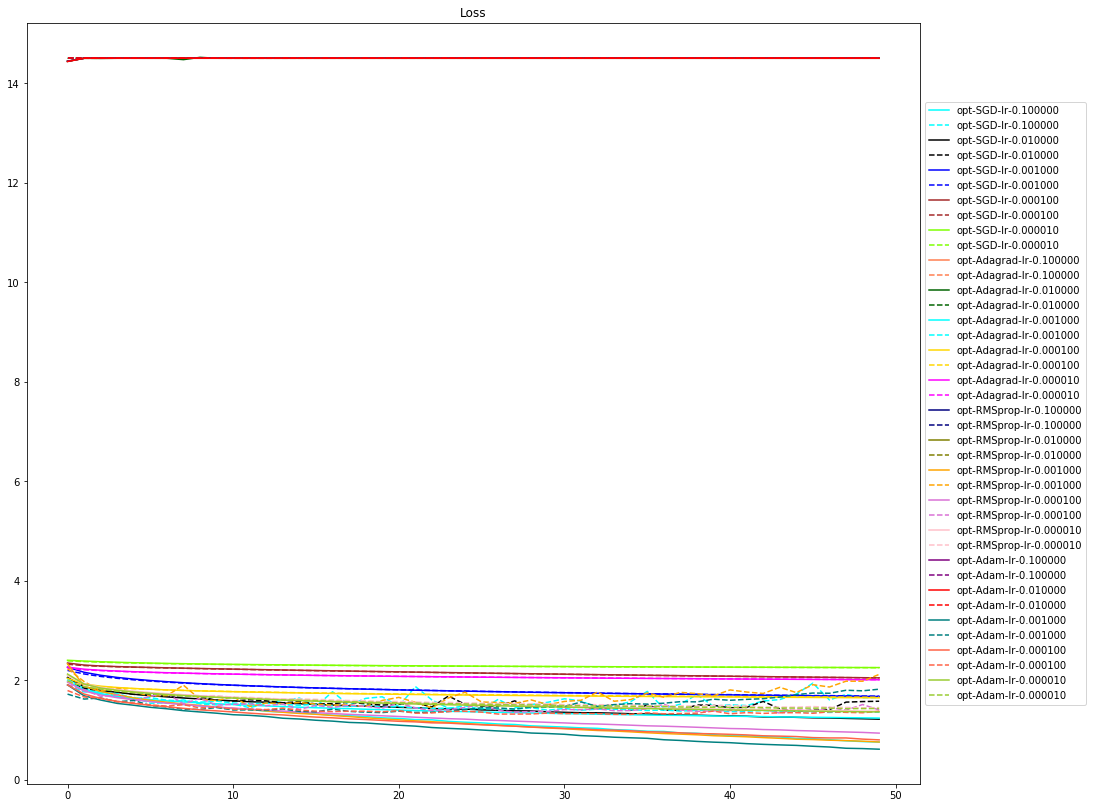

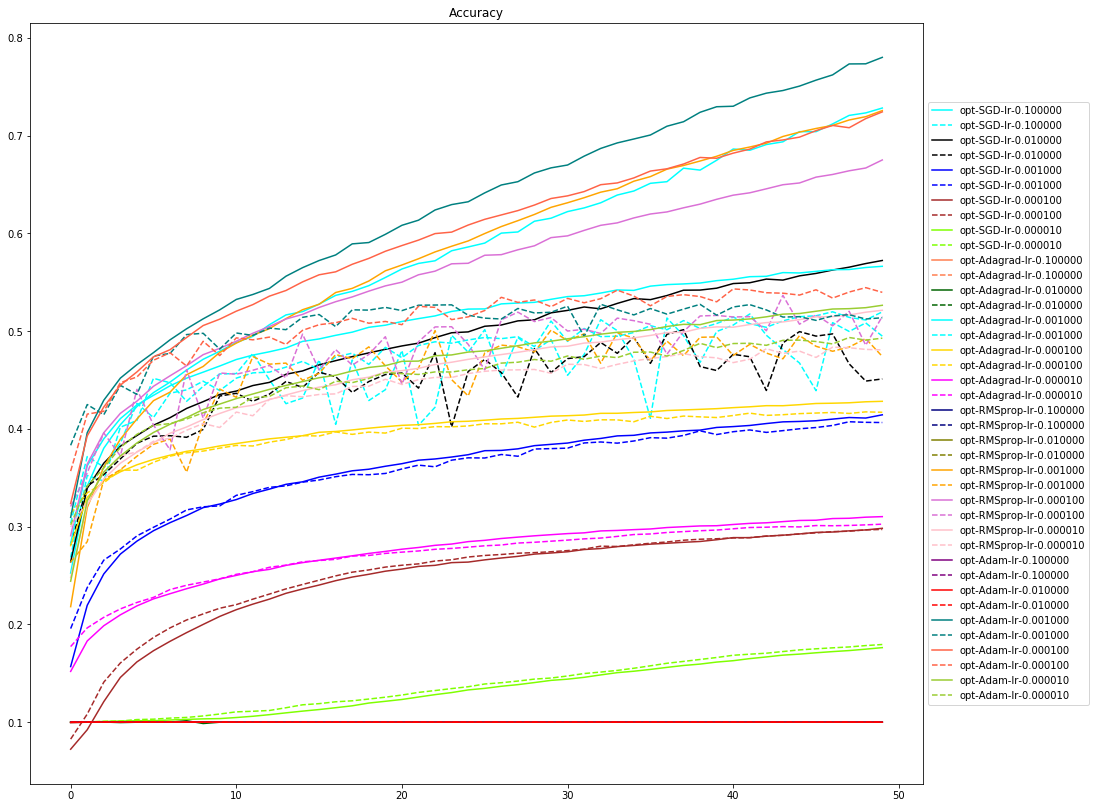

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["aqua", "black", "blue", "brown", "chartreuse", "coral", "darkgreen", "cyan", "gold", "magenta", "navy", "olive", "orange", "orchid", "pink", "purple", "red",  "teal", "tomato", "yellowgreen"]

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()